In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os, random 


#### Plotting Below Average Suf Score

            Feature  Nec Score  Suf Score  NeSuf Score
0        Lagged_Age   0.000000   0.000000      0.00000
1  Lagged_Nutrition   0.000000   0.000000      0.00000
2     Lagged_Health   0.000000   0.000000      0.00000
3   Lagged_Mobility  -0.765114   0.012715      0.02677
4               Age   0.000000   0.000000      0.00000


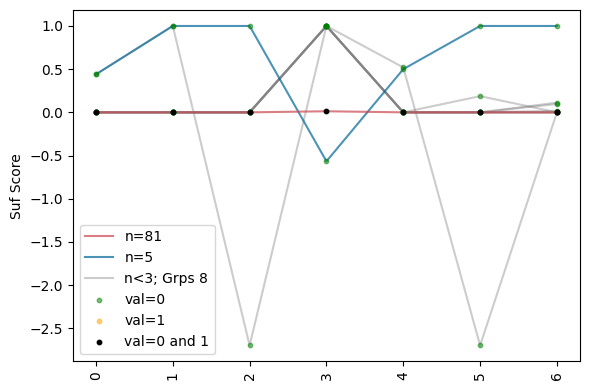

In [3]:
path_patient = os.path.join("..", "results", "LEWIS", "patients_below_100.csv")
path_scores = os.path.join("..", "results", "LEWIS", "results_below_100.csv")

values = pd.read_csv(path_patient)
values.drop(columns=['Unnamed: 0'], inplace=True)

scores = pd.read_csv(path_scores)
scores.drop(columns=['Unnamed: 0'], inplace=True)
print(scores.head())

plt.figure(figsize=(6, 4))

typ = "Suf Score"

features = [[] for feat in values.columns]
for i in range(len(scores)):
    features[i % 7].append(scores[typ].values[i])

dic = {}
for counter, name in enumerate(values.columns):
    dic[name] = features[counter]

df = pd.DataFrame(dic, columns=values.columns)

groupsScores = df.groupby(df.columns.tolist()).groups.values()
groupsScores = sorted(groupsScores, key=len, reverse=False)

# add random colors as hex to a list of colors (10 colors for 10 groups)
colors = [ "#cb4751", "#006699", "#cb4751", "#006699"]

#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

group_id = 1
small_groups_count = 0
lines = []  # list to store lines
labels = []  # list to store labels
for group in groupsScores:
    idx = random.choice(group)
    row = df.iloc[idx]
    row = row.to_numpy()

    if len(group) > 3:
        line, = plt.plot(row, alpha=0.7, color=colors[group_id % 4])
        lines.append(line)
        labels.append(f'n={len(group)}')
        group_id += 1
    else:
        line, = plt.plot(row, color='grey', alpha=0.4)
        small_groups_count += 1


    # Add Scatter Plot of the group, value 1 is colored orange while 0 is green. Still use x axis (features)
    # to plot the scatter plot


for group in groupsScores:
    
    for counter, feature in enumerate(values.columns):
        
        is_low = False 
        is_high = False 
        is_both = False 

        for idx in group:
            row_values = values.iloc[idx]
            row_values = row_values.to_numpy()

            if row_values[counter] == 0 and not is_low:
                is_low = True
            elif row_values[counter] == 1 and not is_high:
                is_high = True

        if is_low and is_high:
            is_both = True
            plt.scatter(counter, df[feature].values[idx], color='black', alpha=1, s=10, zorder=3)
        elif is_low:
            plt.scatter(counter, df[feature].values[idx], color='green', alpha=0.5, s=10, zorder=3)
        elif is_high:
            plt.scatter(counter, df[feature].values[idx], color='orange', alpha=0.5, s=10, zorder=3)




mylines = lines[::-1] + [Line2D([0], [0], color='#cccccc', linestyle='-')]
mylines += [plt.scatter([], [], color='green', alpha=0.5, s=10, zorder=3), plt.scatter([], [], color='orange', alpha=0.5, s=10, zorder=3), plt.scatter([], [], color='black', alpha=1, s=10, zorder=3)]


mylabels = labels[::-1] + [f'n<3; Grps {small_groups_count}']
mylabels += ['val=0', 'val=1', 'val=0 and 1']

plt.ylabel('Suf Score')
plt.xticks(rotation=90) 

# use the lines and labels lists to create the legend
plt.legend(mylines, mylabels , loc='best', fontsize=10)
plt.tight_layout()
plt.savefig('counterfactuals_below.svg')
plt.show()

# Above Avg Mobility

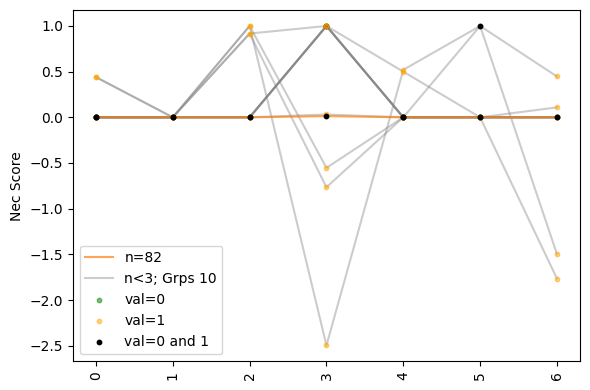

In [5]:
path_patient = os.path.join("..", "results", "LEWIS", "patients_above_100.csv")
path_scores = os.path.join("..", "results", "LEWIS", "results_above_100.csv")

values = pd.read_csv(path_patient)
values.drop(columns=['Unnamed: 0'], inplace=True)

scores = pd.read_csv(path_scores)
scores.drop(columns=['Unnamed: 0'], inplace=True)


plt.figure(figsize=(6, 4))

typ = "Nec Score"

features = [[] for feat in values.columns]
for i in range(len(scores)):
    features[i % 7].append(scores[typ].values[i])

dic = {}
for counter, name in enumerate(values.columns):
    dic[name] = features[counter]

df = pd.DataFrame(dic, columns=values.columns)

groupsScores = df.groupby(df.columns.tolist()).groups.values()
groupsScores = sorted(groupsScores, key=len, reverse=False)

#colors = [ "#cb4751", "#006699", "#cb4751", "#006699"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
group_id = 1
small_groups_count = 0
lines = []  # list to store lines
labels = []  # list to store labels
for group in groupsScores:
    idx = random.choice(group)
    row = df.iloc[idx]
    row = row.to_numpy()

    if len(group) > 3:
        line, = plt.plot(row, alpha=0.7, color=colors[group_id % 4])
        lines.append(line)
        labels.append(f'n={len(group)}')
        group_id += 1
    else:
        line, = plt.plot(row, color='grey', alpha=0.4)
        small_groups_count += 1


    # Add Scatter Plot of the group, value 1 is colored orange while 0 is green. Still use x axis (features)
    # to plot the scatter plot


for group in groupsScores:
    
    for counter, feature in enumerate(values.columns):
        
        is_low = False 
        is_high = False 
        is_both = False 

        for idx in group:
            row_values = values.iloc[idx]
            row_values = row_values.to_numpy()

            if row_values[counter] == 0 and not is_low:
                is_low = True
            elif row_values[counter] == 1 and not is_high:
                is_high = True

        if is_low and is_high:
            is_both = True
            plt.scatter(counter, df[feature].values[idx], color='black', alpha=1, s=10, zorder=3)
        elif is_low:
            plt.scatter(counter, df[feature].values[idx], color='green', alpha=0.5, s=10, zorder=3)
        elif is_high:
            plt.scatter(counter, df[feature].values[idx], color='orange', alpha=0.5, s=10, zorder=3)




mylines = lines[::-1] + [Line2D([0], [0], color='#cccccc', linestyle='-')]
mylines += [plt.scatter([], [], color='green', alpha=0.5, s=10, zorder=3), plt.scatter([], [], color='orange', alpha=0.5, s=10, zorder=3), plt.scatter([], [], color='black', alpha=1, s=10, zorder=3)]


mylabels = labels[::-1] + [f'n<3; Grps {small_groups_count}']
mylabels += ['val=0', 'val=1', 'val=0 and 1']

plt.ylabel('Nec Score')
plt.xticks(rotation=90) 

# use the lines and labels lists to create the legend
plt.legend(mylines, mylabels , loc='best', fontsize=10)
plt.tight_layout()
plt.savefig('counterfactuals_above.svg')
plt.show()